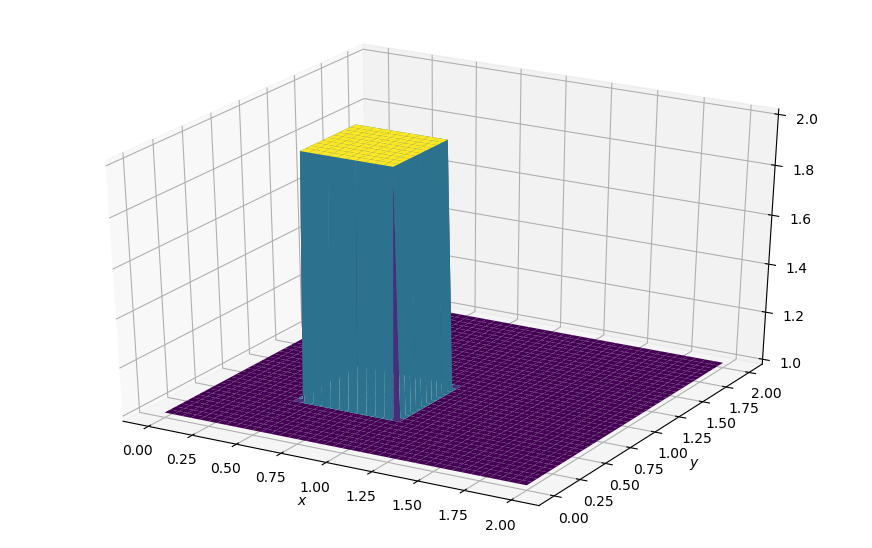

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = 0.2
dt = sigma * dx

x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))

v = numpy.ones((ny,nx))
vn = numpy.ones((ny,nx))

u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [14]:
for n in range (nt+1):
    un = u.copy()
    vn = v.copy()
    u[1:,1:] = un[1:,1:] - (un[1:,1:]*dt/dx)*(un[1:,1:]-un[1:,0:-1]) - (vn[1:,1:]*dt/dy)*(un[1:,1:]-un[0:-1,1:])
    v[1:,1:] = vn[1:,1:] - (un[1:,1:]*dt/dx)*(vn[1:,1:]-vn[1:,0:-1]) - (vn[1:,1:]*dt/dy)*(vn[1:,1:]-vn[0:-1,1:])
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1

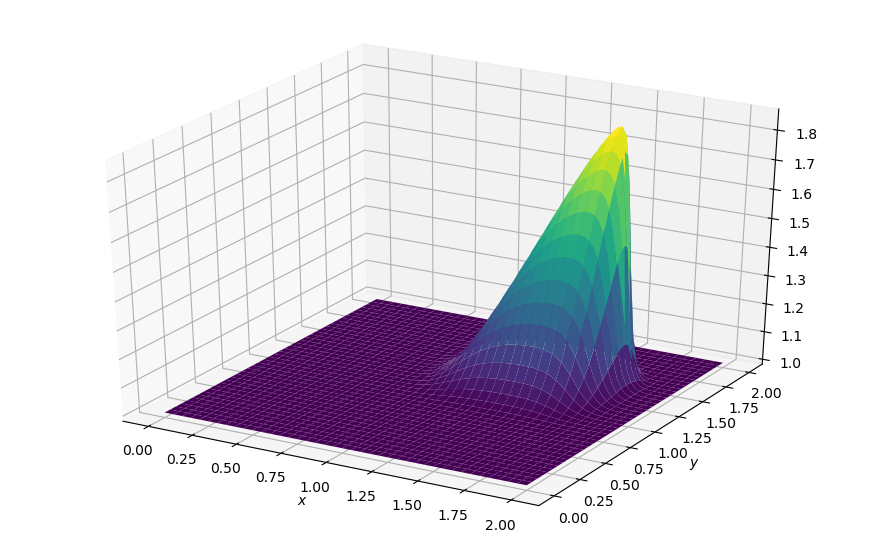

In [15]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');